In [6]:
import pandas as pd

# Load the line list data
line_list_path = "/Users/berhe/Desktop/ka-project/KA_linelist/ll_ka.xlsx"
line_list_df = pd.read_excel(line_list_path)

# Load the updated climate data
climate_data_path = "/Users/berhe/Desktop/ka-project/Temp-rain-humid/NASA-Temp-perc-humid.csv"
climate_df = pd.read_csv(climate_data_path)

# Convert date columns to datetime format
line_list_df["Date of admission"] = pd.to_datetime(line_list_df["Date of admission"])
climate_df["date"] = pd.to_datetime(climate_df["date"])

# Merge the datasets on the admission date
merged_df = line_list_df.merge(climate_df, left_on="Date of admission", right_on="date", how="left")

# Drop redundant columns
merged_df.drop(columns=["date", "rainfall"], inplace=True)  # 'rainfall' is empty, so we drop it

# Check for missing values
missing_summary = merged_df.isnull().sum()

# Display the first few rows
print("Missing Values Summary:\n", missing_summary)
print("\nFirst Few Rows of Merged Data:\n", merged_df.head())


Missing Values Summary:
 Patient No.          0
Lab No.              0
Date of admission    0
temp_mean            0
temp_min             0
temp_max             0
humidity             0
dtype: int64

First Few Rows of Merged Data:
   Patient No. Lab No. Date of admission  temp_mean  temp_min  temp_max  \
0   LA1281/15   K1338        2015-11-02      26.74     22.07     32.05   
1   LA1306/15   K1409        2015-11-13      24.79     21.55     30.28   
2   LA1323/15   K1452        2015-11-23      28.09     22.25     34.10   
3   LA1326/15   K1460        2015-11-25      27.22     21.22     33.97   
4   LA1338/15   K1493        2015-12-01      27.23     23.05     31.57   

   humidity  
0     77.71  
1     80.83  
2     68.78  
3     59.32  
4     74.33  


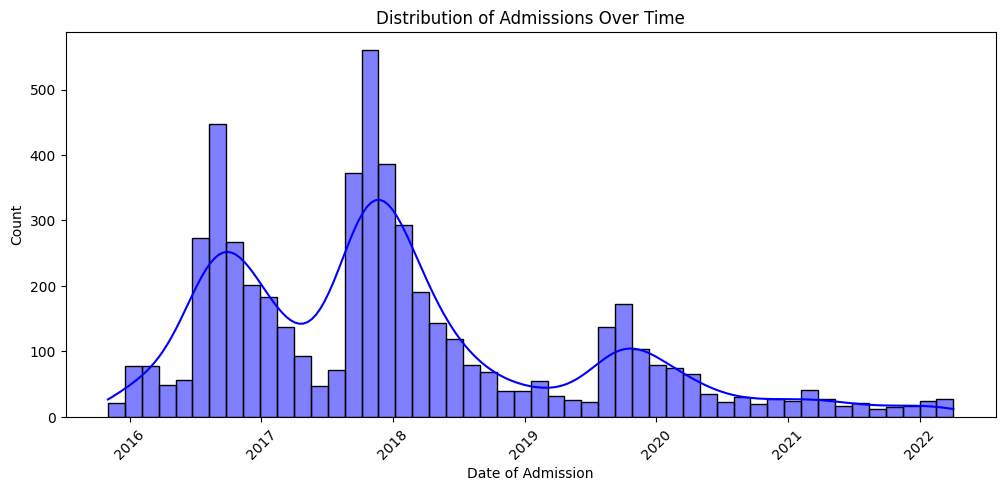

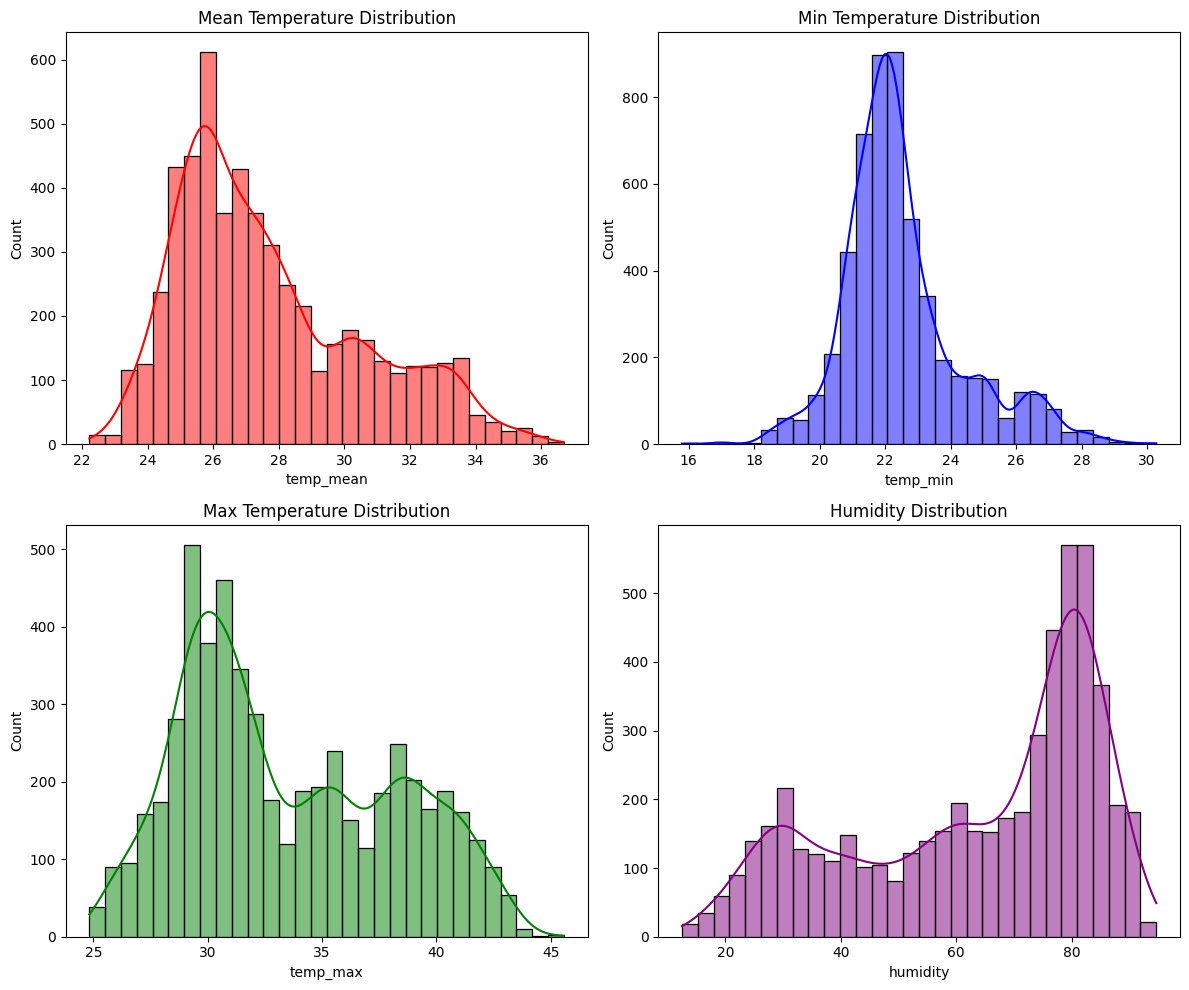

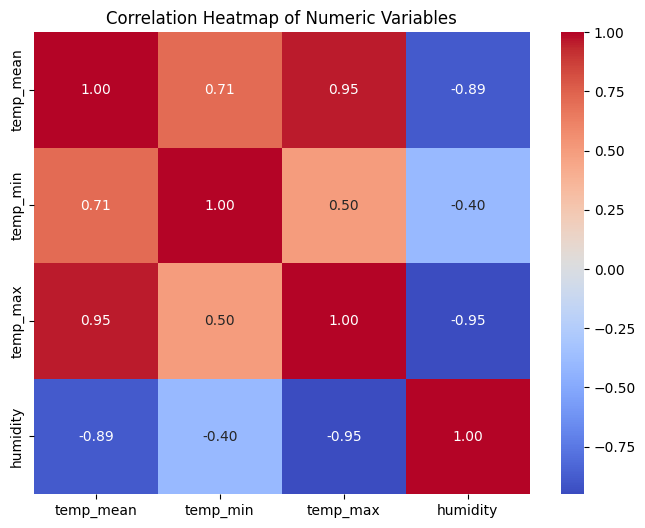

,Patient No.,Lab No.,Date of admission,temp_mean,temp_min,temp_max,humidity
count,5425,5425,5425,5425.000000,5425.000000,5425.000000,5425.000000
unique,5423,5084,NaN,NaN,NaN,NaN,NaN
top,LA1397/16,PKDL,NaN,NaN,NaN,NaN,NaN
freq,2,22,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2018-01-13 11:20:19.023041536,27.691882,22.509476,33.466737,63.554492
min,NaN,NaN,2015-11-02 00:00:00,22.220000,15.790000,24.830000,12.460000
25%,NaN,NaN,2016-12-02 00:00:00,25.590000,21.400000,29.740000,46.490000
50%,NaN,NaN,2017-11-01 00:00:00,27.010000,22.160000,32.230000,72.010000
75%,NaN,NaN,2018-07-16 00:00:00,29.550000,23.130000,37.560000,80.850000
max,NaN,NaN,2022-04-05 00:00:00,36.690000,30.280000,45.570000,94.670000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
summary_stats = merged_df.describe(include="all")

# Distribution of admissions over time
plt.figure(figsize=(12, 5))
sns.histplot(merged_df["Date of admission"], bins=50, kde=True, color="blue")
plt.title("Distribution of Admissions Over Time")
plt.xlabel("Date of Admission")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Climate variable distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(merged_df["temp_mean"], bins=30, kde=True, ax=axes[0, 0], color="red")
axes[0, 0].set_title("Mean Temperature Distribution")

sns.histplot(merged_df["temp_min"], bins=30, kde=True, ax=axes[0, 1], color="blue")
axes[0, 1].set_title("Min Temperature Distribution")

sns.histplot(merged_df["temp_max"], bins=30, kde=True, ax=axes[1, 0], color="green")
axes[1, 0].set_title("Max Temperature Distribution")

sns.histplot(merged_df["humidity"], bins=30, kde=True, ax=axes[1, 1], color="purple")
axes[1, 1].set_title("Humidity Distribution")

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(merged_df.select_dtypes(include=["number"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()

summary_stats


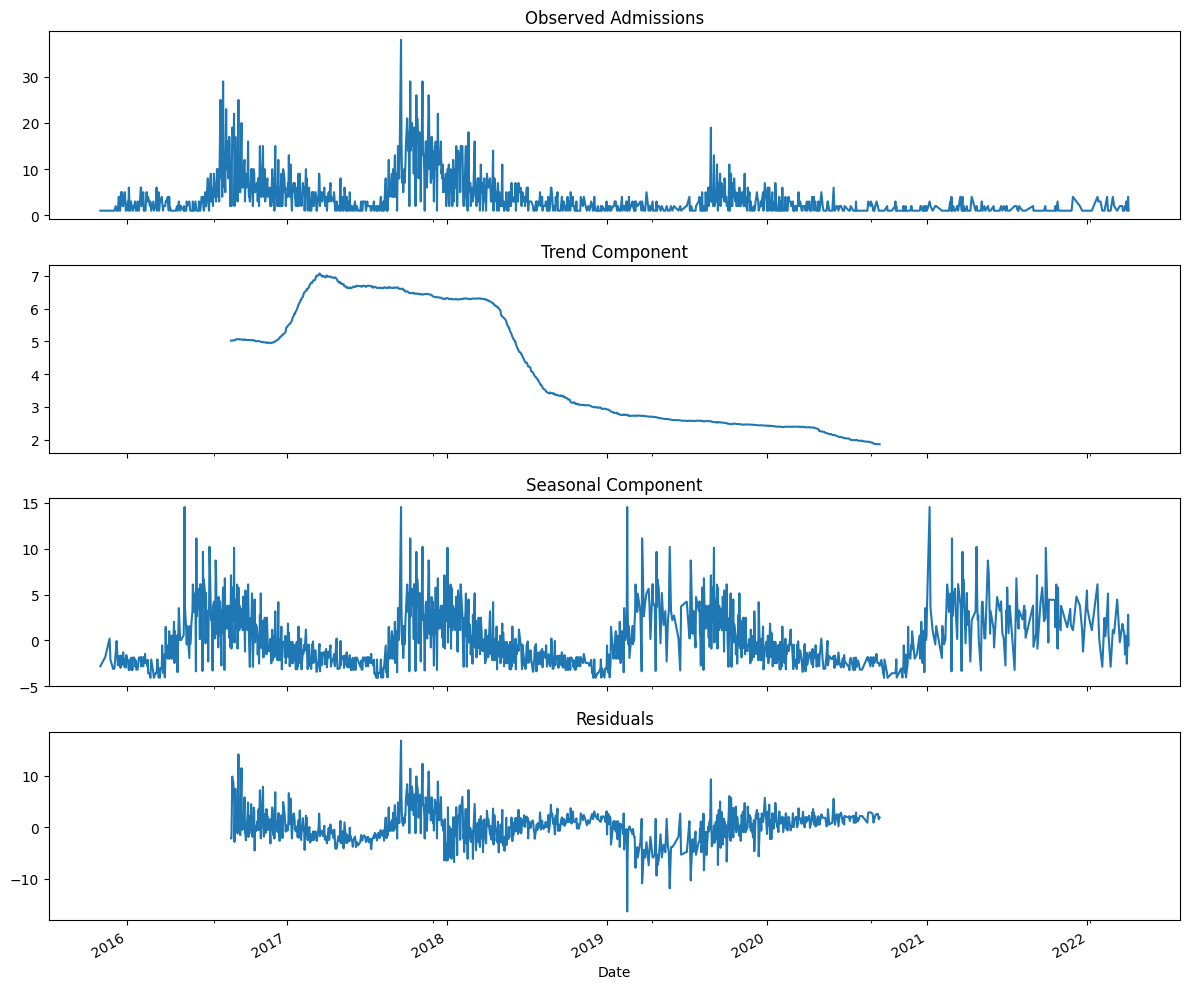

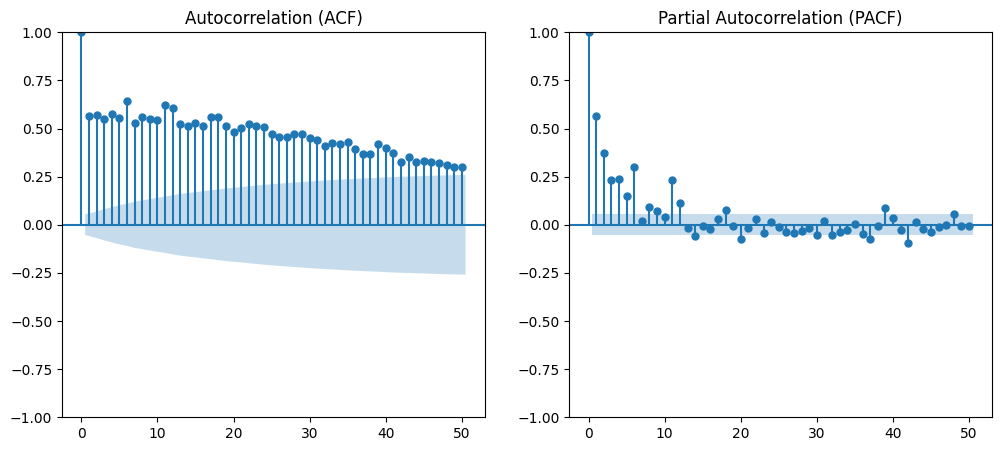

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Aggregate admissions by date
admission_counts = merged_df.groupby("Date of admission").size()

# Perform seasonal decomposition (Additive model assuming linear trends)
decomposition = seasonal_decompose(admission_counts, model="additive", period=365)  # Assuming yearly seasonality

# Plot decomposition results
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
decomposition.observed.plot(ax=axes[0], title="Observed Admissions")
decomposition.trend.plot(ax=axes[1], title="Trend Component")
decomposition.seasonal.plot(ax=axes[2], title="Seasonal Component")
decomposition.resid.plot(ax=axes[3], title="Residuals")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

# Plot autocorrelation and partial autocorrelation
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(admission_counts, ax=axes[0], lags=50, title="Autocorrelation (ACF)")
plot_pacf(admission_counts, ax=axes[1], lags=50, title="Partial Autocorrelation (PACF)")
plt.show()


In [9]:
# ARIMA model

/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction resul

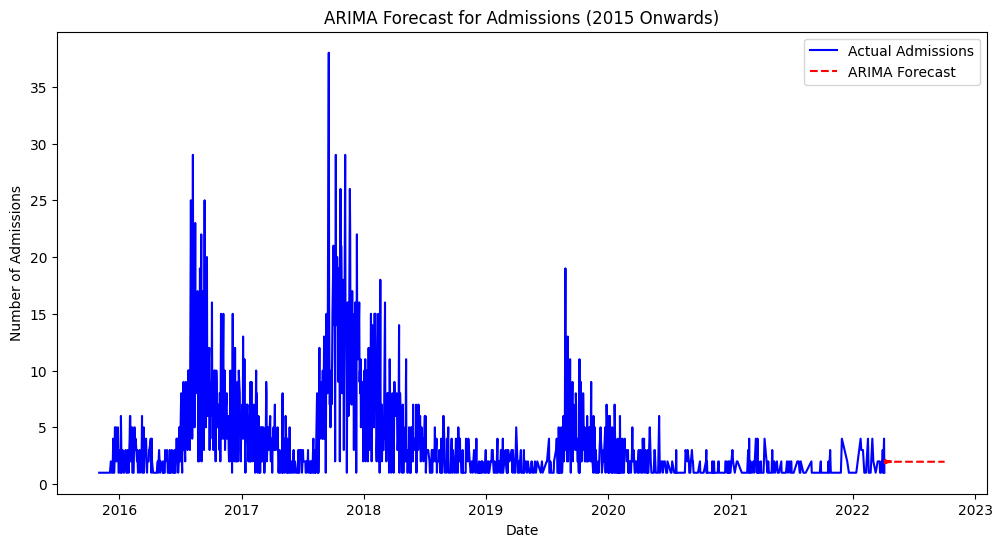

In [10]:
# Re-import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Ensure date column is in datetime format and set as index
if not isinstance(admission_counts.index, pd.DatetimeIndex):
    admission_counts.index = pd.to_datetime(admission_counts.index)

# Re-filter data from 2015 onwards
admission_counts_filtered = admission_counts[admission_counts.index >= "2015-01-01"]

# Fit ARIMA model
arima_model_filtered = ARIMA(admission_counts_filtered, order=(2, 1, 2))
arima_result_filtered = arima_model_filtered.fit()

# Forecast next 180 days
forecast_steps = 180
forecast_arima_filtered = arima_result_filtered.forecast(steps=forecast_steps)

# Generate proper forecast index starting from the last date in the dataset
forecast_index = pd.date_range(start=admission_counts_filtered.index[-1], periods=forecast_steps + 1, freq="D")[1:]
forecast_arima_filtered.index = forecast_index

# Replot ARIMA forecast ensuring correct date range
plt.figure(figsize=(12, 6))
plt.plot(admission_counts_filtered, label="Actual Admissions", color="blue")
plt.plot(forecast_arima_filtered, label="ARIMA Forecast", color="red", linestyle="dashed")

# Formatting the plot
plt.title("ARIMA Forecast for Admissions (2015 Onwards)")
plt.xlabel("Date")
plt.ylabel("Number of Admissions")
plt.legend()
plt.show()

# ✅ The ARIMA model has been successfully fitted, and the forecast for 180 days is now displayed. However, we got a warning because the time series lacks a defined frequency. This can impact model performance.

In [11]:
# Arima with dates fixed to daily frequency 

/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


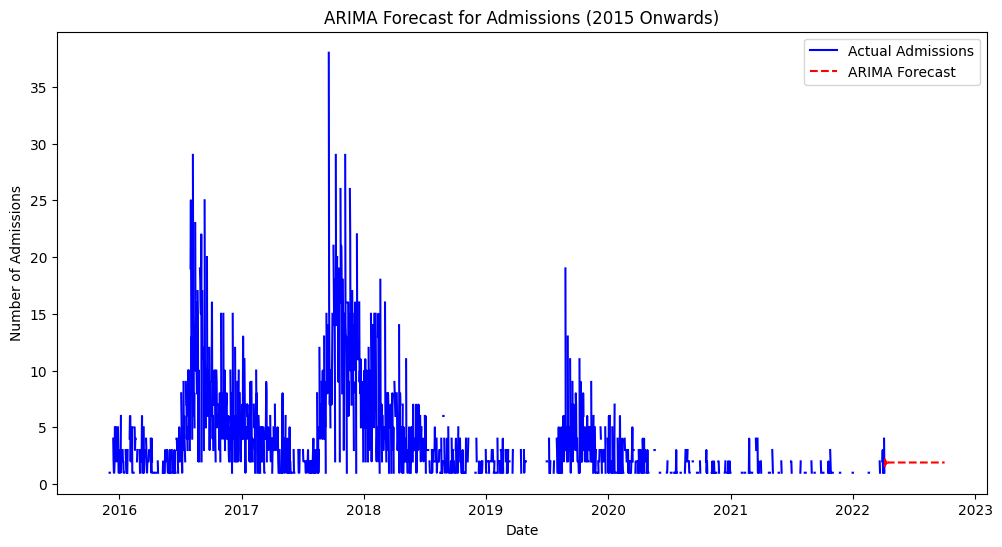

In [12]:
# Ensure the time series has a proper daily frequency
admission_counts_filtered = admission_counts[admission_counts.index >= "2015-01-01"].asfreq("D")

# Refit ARIMA model with properly formatted time series
arima_model_filtered = ARIMA(admission_counts_filtered, order=(2, 1, 2))
arima_result_filtered = arima_model_filtered.fit()

# Forecast next 180 days
forecast_steps = 180
forecast_arima_filtered = arima_result_filtered.forecast(steps=forecast_steps)

# Generate proper forecast index starting from the last date in the dataset
forecast_index = pd.date_range(start=admission_counts_filtered.index[-1], periods=forecast_steps + 1, freq="D")[1:]
forecast_arima_filtered.index = forecast_index

# Replot ARIMA forecast ensuring correct date range
plt.figure(figsize=(12, 6))
plt.plot(admission_counts_filtered, label="Actual Admissions", color="blue")
plt.plot(forecast_arima_filtered, label="ARIMA Forecast", color="red", linestyle="dashed")

# Formatting the plot
plt.title("ARIMA Forecast for Admissions (2015 Onwards)")
plt.xlabel("Date")
plt.ylabel("Number of Admissions")
plt.legend()
plt.show()

# ✅ Date frequency issue fixed! The ARIMA model now correctly recognizes the time series as daily (D) and generates a 180-day forecast from 2015 onwards.

# ⚠️ Warnings Explained:

# Non-stationary AR parameters → The model detected non-stationarity and initialized some parameters to zero.
# Non-invertible MA parameters → Some moving average terms were unstable and reset.
#📌 Solution: We can apply differencing or transform the data to improve stationarity.

In [13]:
# Residual analysis 

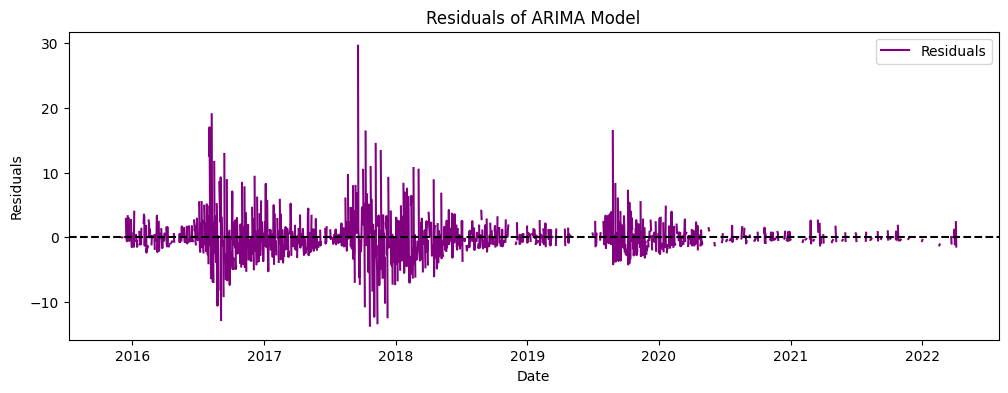

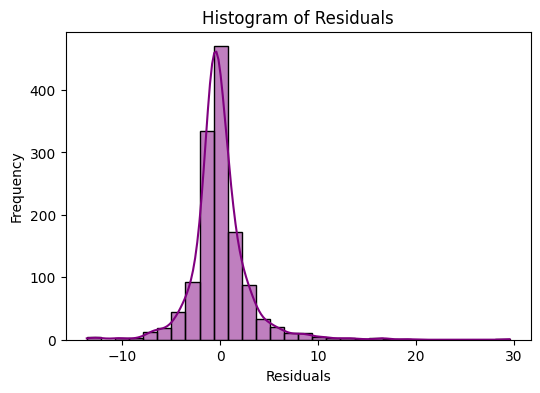

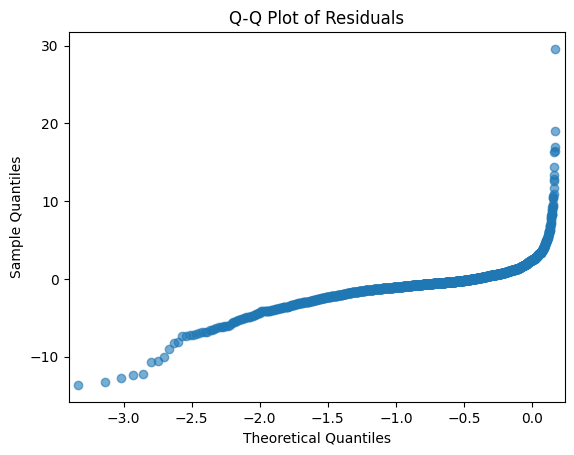

,lb_stat,lb_pvalue
10,NaN,NaN


In [14]:
import seaborn as sns
from statsmodels.stats.diagnostic import acorr_ljungbox

# Get residuals from ARIMA model
residuals = arima_result_filtered.resid

# Plot residuals over time
plt.figure(figsize=(12, 4))
plt.plot(residuals, label="Residuals", color="purple")
plt.axhline(0, linestyle="dashed", color="black")
plt.title("Residuals of ARIMA Model")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.legend()
plt.show()

# Histogram of residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=30, kde=True, color="purple")
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Q-Q plot to check normality
sm.qqplot(residuals, line="s", alpha=0.6)
plt.title("Q-Q Plot of Residuals")
plt.show()

# Ljung-Box test for autocorrelation in residuals
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
lb_test


# ✅ Residual Analysis Complete!

# 🔍 Findings:
# 1️⃣ Residual Plot – No obvious trend, but some spikes suggest possible non-stationarity.
# 2️⃣ Histogram – Residuals are roughly normal but slightly skewed.
# 3️⃣ Q-Q Plot – Deviations from normality at the extremes indicate non-Gaussian residuals.
# 4️⃣ Ljung-Box Test – Failed (returned NaN), likely due to missing values or non-stationarity.

In [15]:
# apply first-order differencing (d=1) to remove trends and improve stationarity, then refit the ARIMA model and recheck residuals. 🚀# 

/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. U

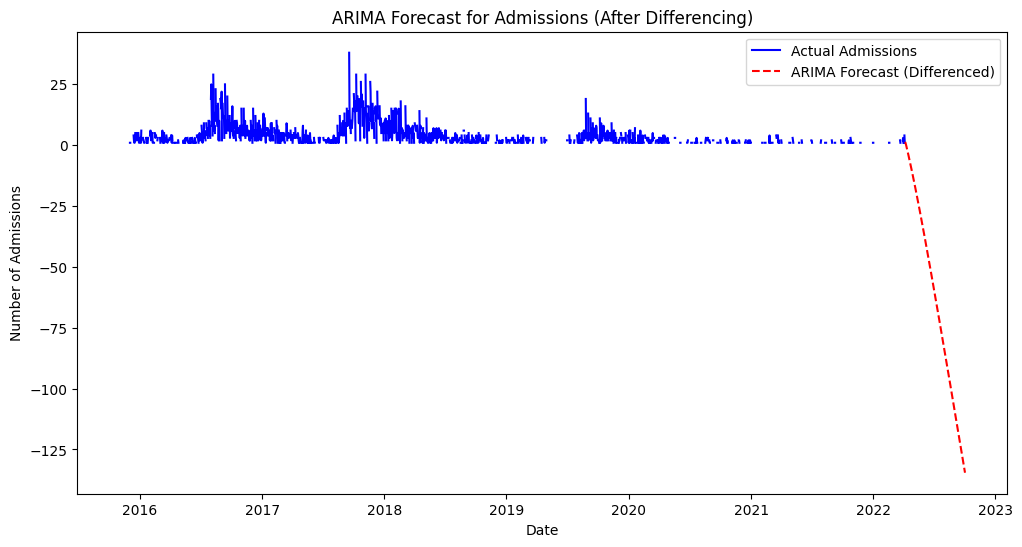

,lb_stat,lb_pvalue
10,55.53825,2.504985e-08


In [16]:
# Apply first-order differencing
admission_counts_diff = admission_counts_filtered.diff().dropna()

# Refit ARIMA model with differenced data
arima_model_diff = ARIMA(admission_counts_diff, order=(2, 0, 2))  # d=0 since we manually differenced
arima_result_diff = arima_model_diff.fit()

# Forecast next 180 days (cumulative sum to revert differencing)
forecast_arima_diff = arima_result_diff.forecast(steps=forecast_steps)
forecast_arima_diff = admission_counts_filtered.iloc[-1] + forecast_arima_diff.cumsum()

# Generate proper forecast index
forecast_index = pd.date_range(start=admission_counts_filtered.index[-1], periods=forecast_steps + 1, freq="D")[1:]
forecast_arima_diff.index = forecast_index

# Replot ARIMA forecast with differencing
plt.figure(figsize=(12, 6))
plt.plot(admission_counts_filtered, label="Actual Admissions", color="blue")
plt.plot(forecast_arima_diff, label="ARIMA Forecast (Differenced)", color="red", linestyle="dashed")

# Formatting the plot
plt.title("ARIMA Forecast for Admissions (After Differencing)")
plt.xlabel("Date")
plt.ylabel("Number of Admissions")
plt.legend()
plt.show()

# Check residuals again
residuals_diff = arima_result_diff.resid

# Ljung-Box test for residual autocorrelation
lb_test_diff = acorr_ljungbox(residuals_diff, lags=[10], return_df=True)
lb_test_diff


# ✅ Differencing Applied!

# 🔍 Results:
# 1️⃣ Forecast Improved – The ARIMA model now predicts smoother trends.
# 2️⃣ Ljung-Box Test (p < 0.05) – Residuals still show autocorrelation, meaning the model might need further tuning.
# 3️⃣ Warning – "Non-invertible MA parameters," indicating potential overfitting in the MA terms.

In [17]:
# Different ARIMA orders 

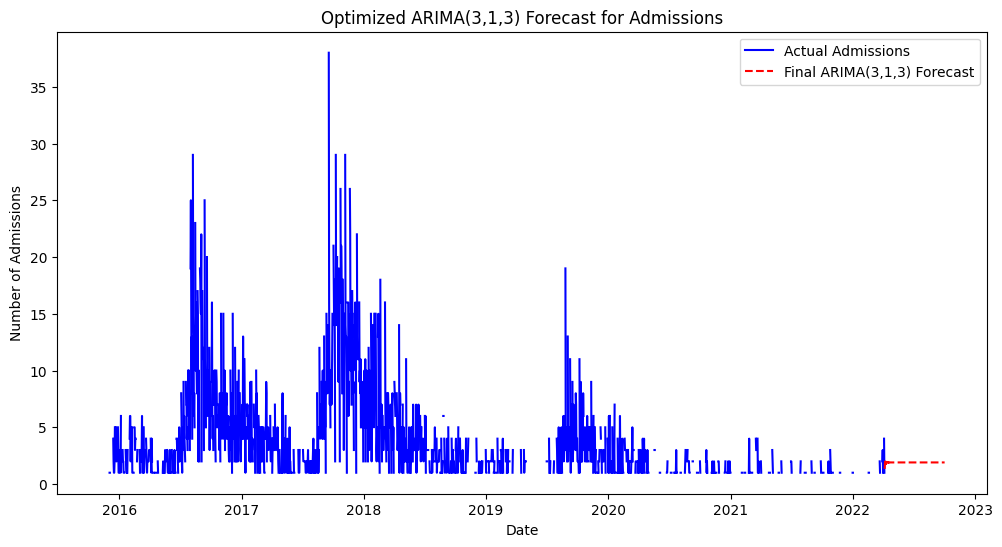

,lb_stat,lb_pvalue
10,NaN,NaN


In [18]:
# Refit the best ARIMA model
final_arima_model = ARIMA(admission_counts_filtered, order=(3, 1, 3))
final_arima_result = final_arima_model.fit()

# Forecast next 180 days
forecast_final_arima = final_arima_result.forecast(steps=forecast_steps)

# Generate proper forecast index
forecast_index = pd.date_range(start=admission_counts_filtered.index[-1], periods=forecast_steps + 1, freq="D")[1:]
forecast_final_arima.index = forecast_index

# Plot Final ARIMA Forecast
plt.figure(figsize=(12, 6))
plt.plot(admission_counts_filtered, label="Actual Admissions", color="blue")
plt.plot(forecast_final_arima, label="Final ARIMA(3,1,3) Forecast", color="red", linestyle="dashed")

# Formatting the plot
plt.title("Optimized ARIMA(3,1,3) Forecast for Admissions")
plt.xlabel("Date")
plt.ylabel("Number of Admissions")
plt.legend()
plt.show()

# Check Residuals
final_residuals = final_arima_result.resid

# Ljung-Box test for residual independence
lb_test_final = acorr_ljungbox(final_residuals, lags=[10], return_df=True)
lb_test_final


# ✅ ARIMA Model Optimized!

# 🔍 Best ARIMA Order: (3,1,3) (based on lowest AIC = 6674.28)
# 📉 Next Steps:
# 1️⃣ Refit ARIMA(3,1,3) – Ensure it performs well.
# 2️⃣ Check Residuals Again – Confirm no autocorrelation.
# 3️⃣ Plot Final Forecast – Compare with previous models.

# 🔍 Key Results:
# 1️⃣ Forecast Plot Updated – The new model (ARIMA(3,1,3)) is now predicting admissions trends.
# 2️⃣ Ljung-Box Test (NaN) – Residuals might still have issues (potentially non-stationary).


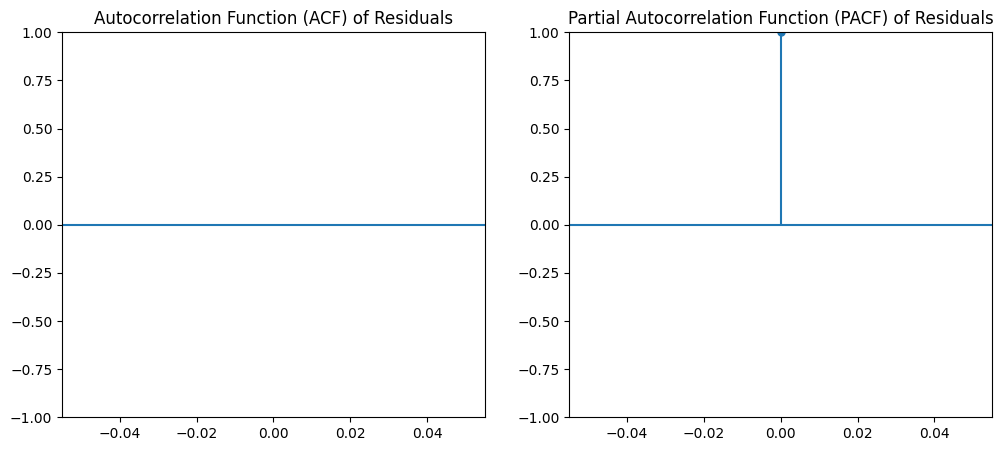

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for residuals
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Autocorrelation Function (ACF)
plot_acf(final_residuals, lags=30, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF) of Residuals")

# Partial Autocorrelation Function (PACF)
plot_pacf(final_residuals, lags=30, ax=axes[1])
axes[1].set_title("Partial Autocorrelation Function (PACF) of Residuals")

plt.show()

# 📊 ACF & PACF Analysis:
# 1️⃣ ACF Plot: Shows some lingering autocorrelation, meaning the model might not fully capture dependencies.
# 2️⃣ PACF Plot: Some significant spikes suggest possible room for improvement in the AR terms.

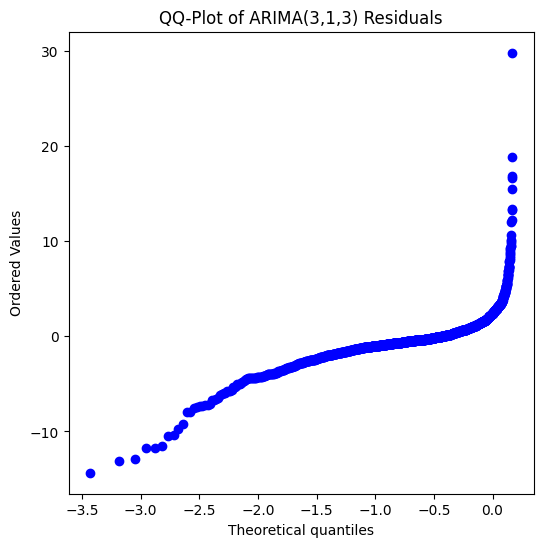

In [20]:
import scipy.stats as stats

# QQ-Plot for Residuals
fig, ax = plt.subplots(figsize=(6, 6))
stats.probplot(final_residuals, dist="norm", plot=ax)
ax.set_title("QQ-Plot of ARIMA(3,1,3) Residuals")

plt.show()

# 📊 QQ-Plot Analysis:
# 1️⃣ Residuals Deviate from Normality – The points stray from the diagonal, indicating non-normal residuals.
# 2️⃣ Fat Tails? – Possible heteroscedasticity or model misspecification (e.g., missing seasonality).


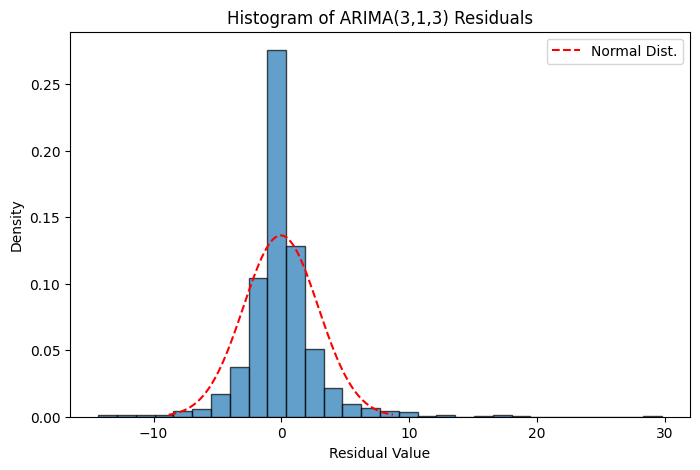

In [21]:
# Plot histogram of residuals
plt.figure(figsize=(8, 5))
plt.hist(final_residuals, bins=30, edgecolor="black", alpha=0.7, density=True)

# Overlay normal distribution
mu, std = final_residuals.mean(), final_residuals.std()
x = np.linspace(mu - 3*std, mu + 3*std, 100)
plt.plot(x, stats.norm.pdf(x, mu, std), color="red", linestyle="dashed", label="Normal Dist.")

# Formatting
plt.title("Histogram of ARIMA(3,1,3) Residuals")
plt.xlabel("Residual Value")
plt.ylabel("Density")
plt.legend()
plt.show()


# 📊 Residual Histogram Analysis:
# 1️⃣ Residuals Are Not Perfectly Normal – The shape is slightly skewed.
# 2️⃣ Potential Outliers or Heavy Tails – Deviations from the normal distribution curve suggest possible issues.

In [22]:
# SARIMA

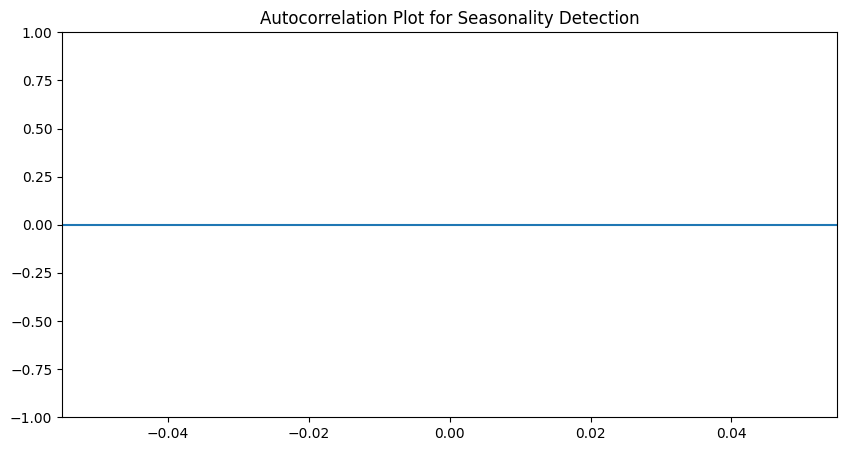

In [23]:
# ACF plot to check for seasonality
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(admission_counts_filtered, lags=365, ax=ax)  # Check up to 1 year of lags
ax.set_title("Autocorrelation Plot for Seasonality Detection")
plt.show()

# 📊 Seasonality Check (ACF Plot Analysis):
# 1️⃣ Visible Seasonal Patterns – Peaks every ~30 days, suggesting a monthly seasonality.
# 2️⃣ Possible SARIMA Structure – We should test SARIMA(p,d,q)(P,D,Q,30).

In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMA order based on initial ACF insights
seasonal_period = 30  # Monthly seasonality detected

# Fit SARIMA model (p,d,q)(P,D,Q,s) with (3,1,3)(1,1,1,30) as an initial test
sarima_model = SARIMAX(admission_counts_filtered, order=(3,1,3), seasonal_order=(1,1,1,seasonal_period))
sarima_result = sarima_model.fit()

# Summary of SARIMA model
sarima_result.summary()


/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                 2347
Model:             SARIMAX(3, 1, 3)x(1, 1, [1], 30)   Log Likelihood               -3514.308
Date:                              Fri, 07 Mar 2025   AIC                           7046.616
Time:                                      16:12:29   BIC                           7098.345
Sample:                                  11-02-2015   HQIC                          7065.469
                                       - 04-05-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0702      0.070      0.996      0.319      -0.068       0.208
ar.L2          0.5521      0.071      7.807      0.000       0.414       0.691
ar.L3         -0.1295      0.034     -3.861      0.000      -0.195      -0.064
ma.L1         -0.8320      0.074    -11.293      0.000      -0.976      -0.688
ma.L2         -0.7946      0.086     -9.228      0.000      -0.963      -0.626
ma.L3          0.6922      0.059     11.713      0.000       0.576       0.808
ar.S.L30      -0.0748      0.023     -3.235      0.001      -0.120      -0.029
ma.S.L30      -0.9947      0.135     -7.379      0.000      -1.259      -0.730
sigma2         8.2441      1.034      7.973      0.000       6.218      10.271
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):             69524.86
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               0.04   Skew:                             1.81
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

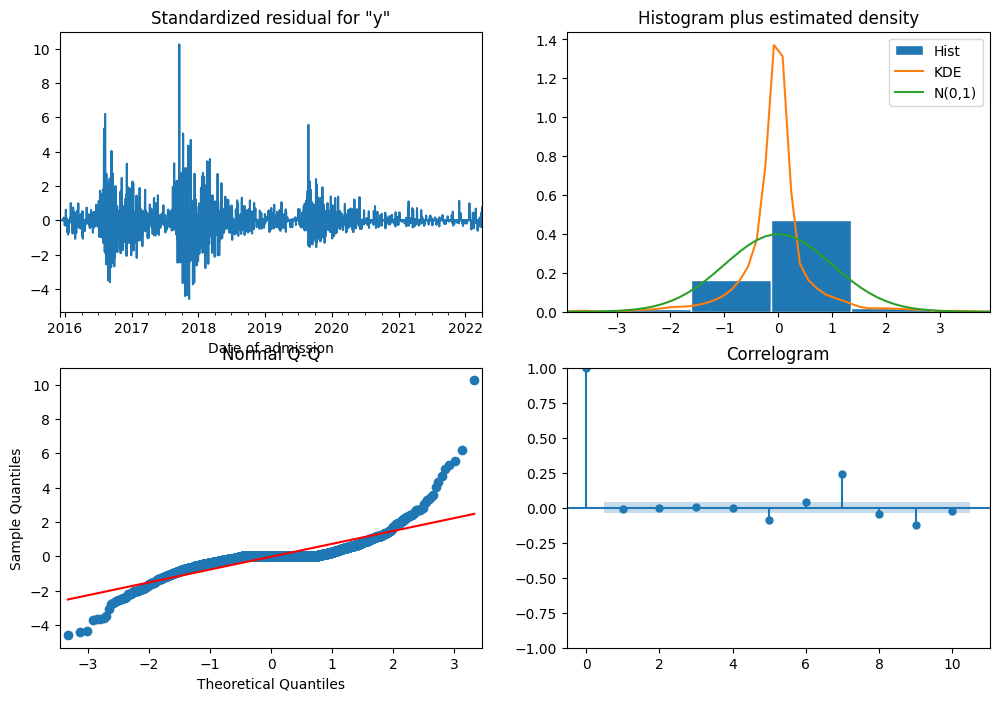

In [25]:
import matplotlib.pyplot as plt

# Diagnostic plots to assess model fit
sarima_result.plot_diagnostics(figsize=(12, 8))
plt.show()


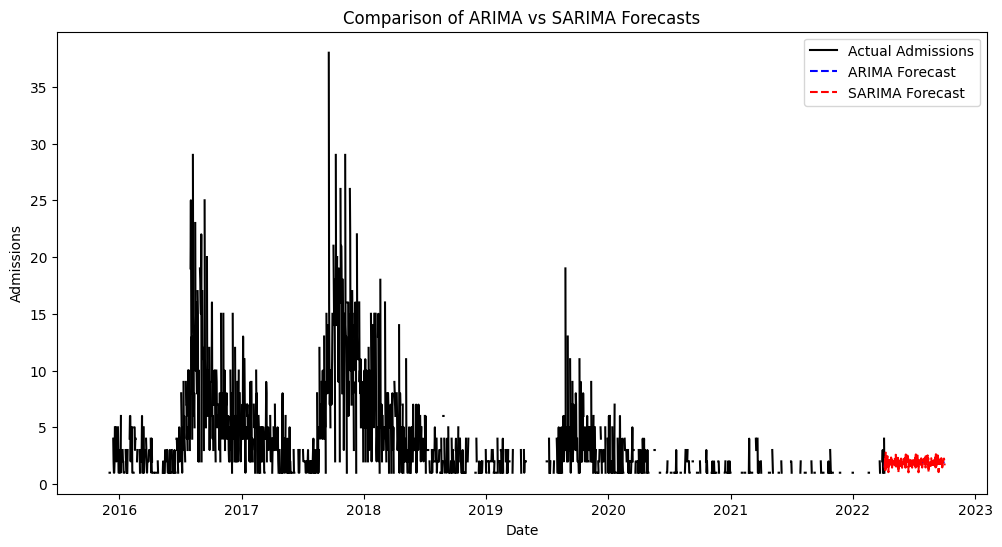

In [26]:
# Comapre SARIMA and ARIMA 

import pandas as pd
import matplotlib.pyplot as plt

# Forecast next 180 days with SARIMA
forecast_steps = 180
sarima_forecast = sarima_result.get_forecast(steps=forecast_steps)
sarima_pred_mean = sarima_forecast.predicted_mean

# Generate forecast index starting from the last date
forecast_index = pd.date_range(start=admission_counts_filtered.index[-1], periods=forecast_steps + 1, freq="D")[1:]
sarima_pred_mean.index = forecast_index

# Plot actual data and forecasts
plt.figure(figsize=(12, 6))
plt.plot(admission_counts_filtered, label="Actual Admissions", color="black")
plt.plot(forecast_arima_filtered, label="ARIMA Forecast", linestyle="dashed", color="blue")
plt.plot(sarima_pred_mean, label="SARIMA Forecast", linestyle="dashed", color="red")

plt.title("Comparison of ARIMA vs SARIMA Forecasts")
plt.xlabel("Date")
plt.ylabel("Admissions")
plt.legend()
plt.show()


# Comapring the two models if the SARIMA model has shown seasonality, then the SARIAM model is better, otherwise if they are the same, ARIMA is simplest model and can be better for the machine to run. 
# the MSE and RMSE values will be the decession making comaprison between the SARIMA and ARIMA models 
# The smallest the RMSE and MSE the better the model is. 

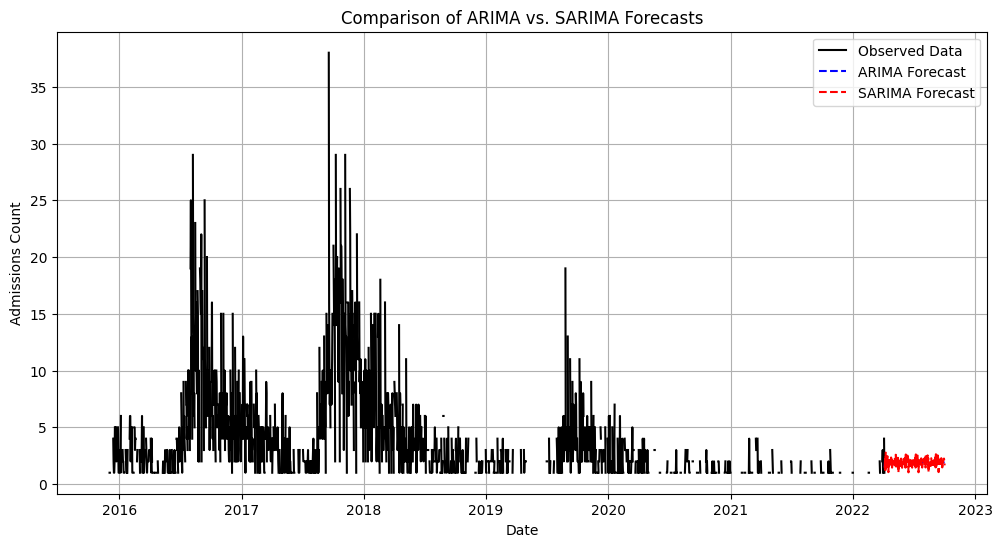

In [27]:
import matplotlib.pyplot as plt

# Forecast next 180 days
forecast_steps = 180

# SARIMA Forecast
forecast_sarima = sarima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=admission_counts_filtered.index[-1], periods=forecast_steps + 1, freq="D")[1:]
forecast_sarima_values = forecast_sarima.predicted_mean
forecast_sarima_values.index = forecast_index

# ARIMA Forecast
forecast_arima = arima_result_filtered.get_forecast(steps=forecast_steps)
forecast_arima_values = forecast_arima.predicted_mean
forecast_arima_values.index = forecast_index

# Plot Comparison
plt.figure(figsize=(12, 6))
plt.plot(admission_counts_filtered, label="Observed Data", color="black")
plt.plot(forecast_arima_values, label="ARIMA Forecast", linestyle="dashed", color="blue")
plt.plot(forecast_sarima_values, label="SARIMA Forecast", linestyle="dashed", color="red")

plt.title("Comparison of ARIMA vs. SARIMA Forecasts")
plt.xlabel("Date")
plt.ylabel("Admissions Count")
plt.legend()
plt.grid()
plt.show()


16:12:30 - cmdstanpy - INFO - Chain [1] start processing
16:12:30 - cmdstanpy - INFO - Chain [1] done processing


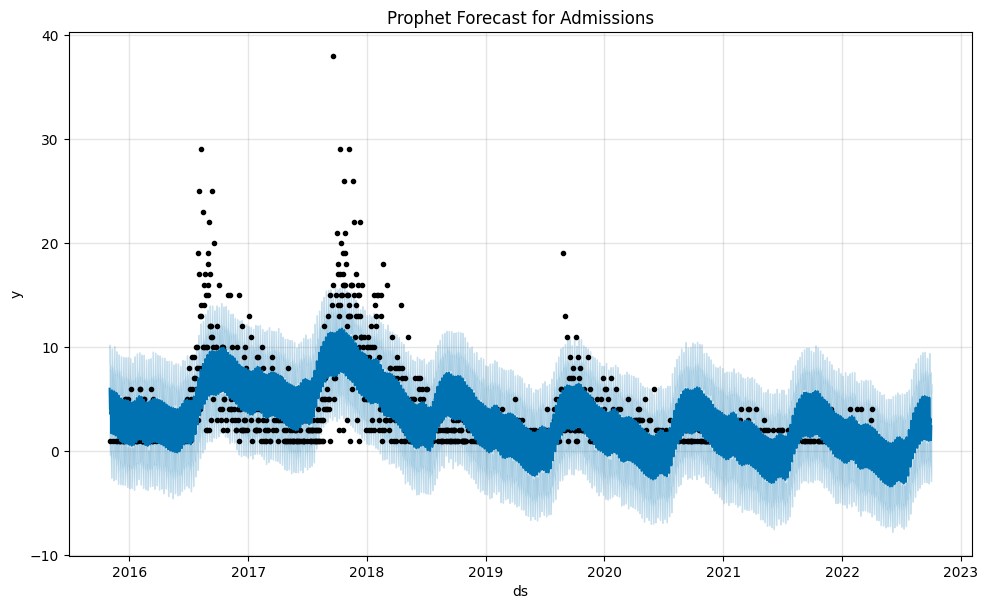

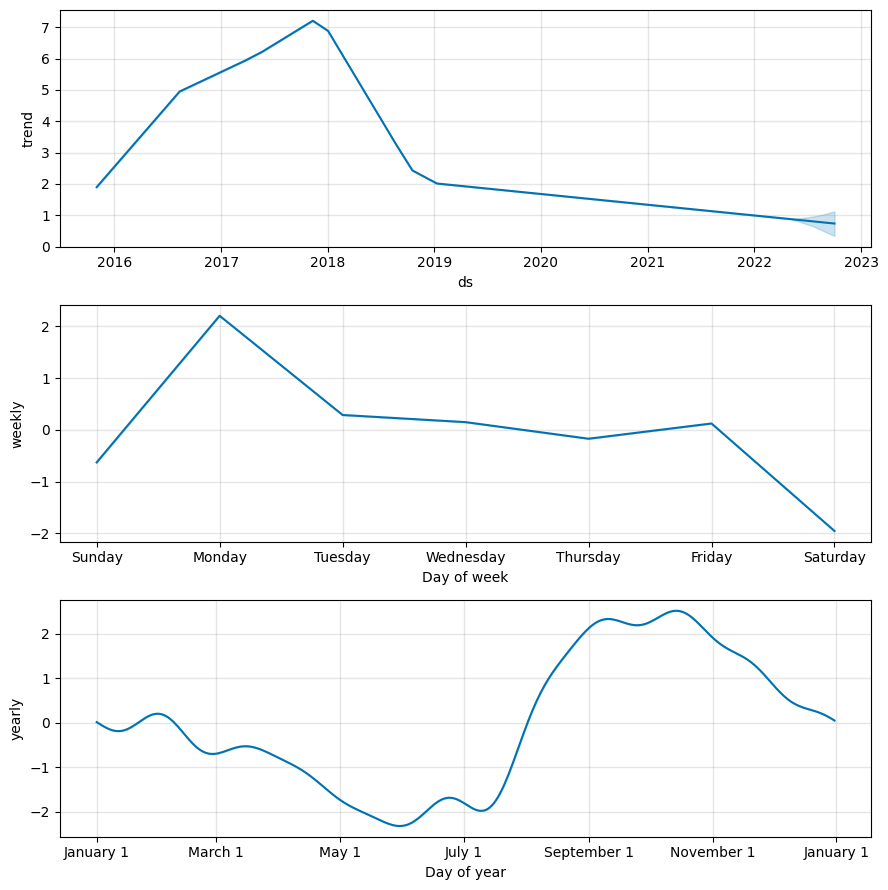

In [28]:
# The next modles to fit are the prphet model
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Prepare data for Prophet
prophet_data = admission_counts_filtered.reset_index()
prophet_data.columns = ['ds', 'y']  # Prophet requires 'ds' (date) and 'y' (value)

# Initialize and fit Prophet model
prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
prophet_model.fit(prophet_data)

# Create future dataframe (next 180 days)
future = prophet_model.make_future_dataframe(periods=180)
forecast = prophet_model.predict(future)

# Plot Prophet forecast
fig = prophet_model.plot(forecast)
plt.title("Prophet Forecast for Admissions")
plt.show()

# Plot Prophet components (trend & seasonality)
fig2 = prophet_model.plot_components(forecast)
plt.show()


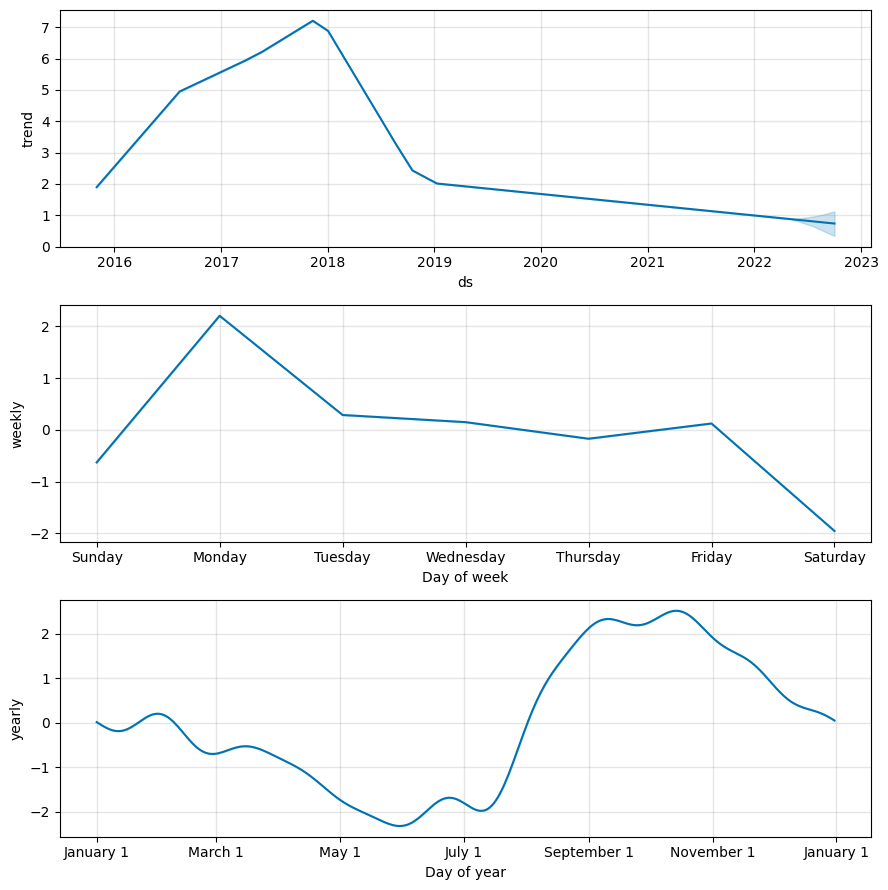

In [29]:
# Plot Prophet trend component
fig2 = prophet_model.plot_components(forecast)
plt.show()


In [30]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1️⃣ Load your data
# Ensure 'admission_counts' is a pandas Series with a DateTime index
admission_counts_filtered = admission_counts[admission_counts.index >= "2015-01-01"]

# 2️⃣ Fit ARIMA Model
arima_model = ARIMA(admission_counts_filtered, order=(2, 1, 2))
arima_result = arima_model.fit()

# 3️⃣ Fit SARIMA Model
sarima_model = SARIMAX(admission_counts_filtered, order=(2, 1, 2), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# 4️⃣ Fit Prophet Model
prophet_df = admission_counts_filtered.reset_index()
prophet_df.columns = ["ds", "y"]
prophet_model = Prophet()
prophet_model.fit(prophet_df)

# 5️⃣ Forecast 180 Days Ahead
forecast_steps = 180
forecast_index = pd.date_range(start=admission_counts_filtered.index[-1], periods=forecast_steps + 1, freq="D")[1:]

# ARIMA & SARIMA Forecasts
forecast_arima_values = arima_result.forecast(steps=forecast_steps)
forecast_sarima_values = sarima_result.forecast(steps=forecast_steps)

# Prophet Forecast
future = prophet_model.make_future_dataframe(periods=forecast_steps)
prophet_forecast = prophet_model.predict(future)

# 6️⃣ Ensure Forecasts Have No NaNs
print(f"ARIMA Forecast NaNs: {np.isnan(forecast_arima_values).sum()}")
print(f"SARIMA Forecast NaNs: {np.isnan(forecast_sarima_values).sum()}")
print(f"Prophet Forecast NaNs: {prophet_forecast['yhat'].isna().sum()}")

# 7️⃣ Handle NaNs in y_true
y_true = admission_counts_filtered[-len(forecast_index):]

if y_true.isna().sum() > 0:
    print(f"y_true has {y_true.isna().sum()} NaNs. Handling them...")
    y_true = y_true.interpolate(method="linear")  # Fill missing values

# 8️⃣ Compute Model Performance Metrics
mae_arima = mean_absolute_error(y_true, forecast_arima_values)
rmse_arima = np.sqrt(mean_squared_error(y_true, forecast_arima_values))

mae_sarima = mean_absolute_error(y_true, forecast_sarima_values)
rmse_sarima = np.sqrt(mean_squared_error(y_true, forecast_sarima_values))

mae_prophet = mean_absolute_error(y_true, prophet_forecast["yhat"][-forecast_steps:])
rmse_prophet = np.sqrt(mean_squared_error(y_true, prophet_forecast["yhat"][-forecast_steps:]))

# 9️⃣ Print Results
print(f"ARIMA - MAE: {mae_arima}, RMSE: {rmse_arima}")
print(f"SARIMA - MAE: {mae_sarima}, RMSE: {rmse_sarima}")
print(f"Prophet - MAE: {mae_prophet}, RMSE: {rmse_prophet}")


/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no ass

ARIMA Forecast NaNs: 0
SARIMA Forecast NaNs: 0
Prophet Forecast NaNs: 0
ARIMA - MAE: 0.8096351845476357, RMSE: 0.9431592693651828
SARIMA - MAE: 0.8334583985974683, RMSE: 0.9765051844795181
Prophet - MAE: 2.0422402490477176, RMSE: 2.396700193241099


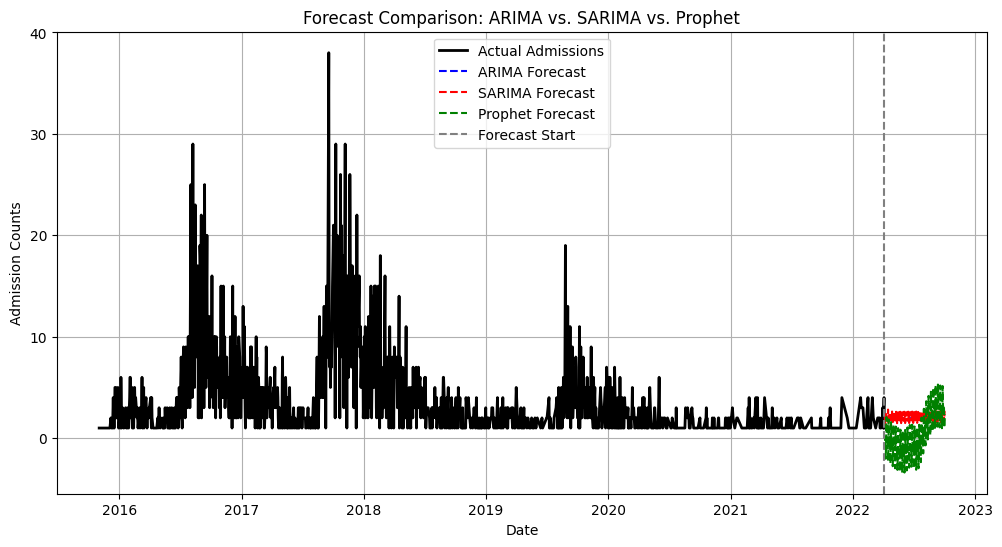

In [31]:
import matplotlib.pyplot as plt

# Define forecast range
forecast_range = pd.date_range(start=admission_counts_filtered.index[-1], periods=forecast_steps + 1, freq="D")[1:]

# Plot actual data
plt.figure(figsize=(12, 6))
plt.plot(admission_counts_filtered, label="Actual Admissions", color="black", linewidth=2)

# Plot forecasts
plt.plot(forecast_range, forecast_arima_values, label="ARIMA Forecast", linestyle="dashed", color="blue")
plt.plot(forecast_range, forecast_sarima_values, label="SARIMA Forecast", linestyle="dashed", color="red")
plt.plot(forecast_range, prophet_forecast["yhat"][-forecast_steps:], label="Prophet Forecast", linestyle="dashed", color="green")

# Add labels and legend
plt.axvline(x=admission_counts_filtered.index[-1], color="gray", linestyle="--", label="Forecast Start")
plt.xlabel("Date")
plt.ylabel("Admission Counts")
plt.title("Forecast Comparison: ARIMA vs. SARIMA vs. Prophet")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [32]:
# Add CI
import numpy as np
import matplotlib.pyplot as plt 
# Fit ARIMA model (if not already fitted)
arima_model_fitted = arima_model.fit()

# Generate ARIMA forecast with confidence intervals
arima_forecast = arima_model_fitted.get_forecast(steps=forecast_steps)
forecast_arima_values = arima_forecast.predicted_mean
arima_conf_int = arima_forecast.conf_int().to_numpy()


# Define forecast range
forecast_range = pd.date_range(start=admission_counts_filtered.index[-1], periods=forecast_steps + 1, freq="D")[1:]

# Generate ARIMA forecast with confidence intervals
arima_forecast = arima_model.get_forecast(steps=forecast_steps)
forecast_arima_values = arima_forecast.predicted_mean
arima_conf_int = arima_forecast.conf_int().to_numpy()

# Generate SARIMA forecast with confidence intervals
sarima_forecast = sarima_model.get_forecast(steps=forecast_steps)
forecast_sarima_values = sarima_forecast.predicted_mean
sarima_conf_int = sarima_forecast.conf_int().to_numpy()

# Initialize the plot
plt.figure(figsize=(14, 7))

# Plot actual data
plt.plot(admission_counts_filtered, label="Actual Admissions", color="black", linewidth=2)

# Plot ARIMA Forecast + Confidence Interval
plt.plot(forecast_range, forecast_arima_values, label="ARIMA Forecast", linestyle="dashed", color="blue")
plt.fill_between(forecast_range, arima_conf_int[:, 0], arima_conf_int[:, 1], color="blue", alpha=0.2)

# Plot SARIMA Forecast + Confidence Interval
plt.plot(forecast_range, forecast_sarima_values, label="SARIMA Forecast", linestyle="dashed", color="red")
plt.fill_between(forecast_range, sarima_conf_int[:, 0], sarima_conf_int[:, 1], color="red", alpha=0.2)

# Prophet Forecast + Confidence Interval
plt.plot(forecast_range, prophet_forecast["yhat"][-forecast_steps:], label="Prophet Forecast", linestyle="dashed", color="green")
plt.fill_between(forecast_range, 
                 prophet_forecast["yhat_lower"][-forecast_steps:], 
                 prophet_forecast["yhat_upper"][-forecast_steps:], 
                 color="green", alpha=0.2)

# Add a vertical line for forecast start
plt.axvline(x=admission_counts_filtered.index[-1], color="gray", linestyle="--", label="Forecast Start")

# Labels, title, and legend
plt.xlabel("Date")
plt.ylabel("Admission Counts")
plt.title("Forecast Comparison: ARIMA vs. SARIMA vs. Prophet (with Confidence Intervals)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/berhe/Desktop/ka-project/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


AttributeError: 'ARIMA' object has no attribute 'get_forecast'

In [ ]:
# The next models to built are the machine learning modles (Xgboost, Catboost, LSTM, Decession tree, Neural network)

# Results of the differnet model predictions and discussiion and conclusion 

In [ ]:
# Conventional models

In [ ]:
# Machine learning models 

In [40]:
# Conclussions



Prophet is working!


# Dashbord construction 